# PBL on Portfolio optimization
In this module, we apply the formulas from the module on portfolio optimization. We start with synthetic data before applying this method to stockmarket data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 
We start by generating synthetic data. We use a seed in order to obtain reproducible data.

In [62]:
np.random.seed(100)
T = 2000 + 1
n = 5
values = np.random.rand(T * n)
values = values.reshape((T, n))

for i in range(n):
    offset = 200 * (np.random.rand()+0.5)
    trend = np.exp(0.02 * (0.2 + np.random.rand() )* np.linspace(0, 200, T) )
    values[:,i] = values[:,i] + offset + trend *(values[:,i] + 5)


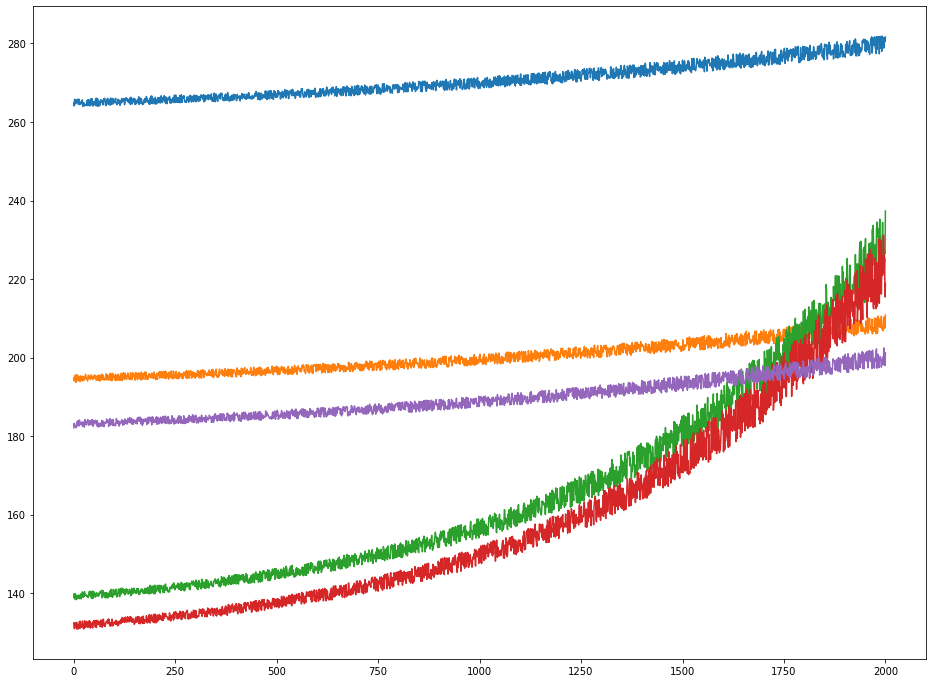

In [63]:
plt.figure(figsize=(16,12))
for i in range(5):
    plt.plot(values[:,i])

## Problem 1:
Compute the fractional revenue matrix using the value 
$$
\frac{V_{t+1}-V_t}{V_t}
$$
and store these values in the matrix $R$ as the entry $R_{ti}$.

In [100]:
#code this up
R = np.zeros((2001,5))
for t in range(T-1):
    for i in range(5):
        R[t,i] = (values[t+1, i]-values[t,i])/values[t,i]
R


array([[-0.00317184,  0.00405913,  0.00583295, -0.01063647,  0.00628526],
       [ 0.00584627, -0.00471834, -0.00911382, -0.00037642, -0.00385979],
       [ 0.00067262,  0.00623135, -0.00014002,  0.01088782,  0.00061651],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

We split the data into training and testing data.

In [101]:
T = 1000
R_train = R[0:T,:]
R_test = R[T:2*T,:]
R = R_train
R

array([[-0.00317184,  0.00405913,  0.00583295, -0.01063647,  0.00628526],
       [ 0.00584627, -0.00471834, -0.00911382, -0.00037642, -0.00385979],
       [ 0.00067262,  0.00623135, -0.00014002,  0.01088782,  0.00061651],
       ...,
       [ 0.00695641,  0.00039585, -0.03016834, -0.01708986,  0.01344567],
       [-0.00439784,  0.0079747 ,  0.02141395,  0.02517656, -0.013751  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [102]:
R_test

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Compute
$$
\mu_i = \frac{1}{T}\sum_{t=0}^{T-1} R_{ti}
$$
and put the results in an $n$-dimensional $\mu$.

In [69]:
# Code this up.
# M = np.empty([1,1])
# sum = 0
# for rt in R:
#     Mi = np.sum(rt)
#     print(sum)
#     break
#         # R = np.append(R,[Ri], axis=0)
n = 5
M = np.zeros(n)
for i in range(n):
    M[i] = np.mean(R[:T, i])
    
M


array([2.49476525e-05, 4.25650657e-05, 1.71195759e-04, 1.78833265e-04,
       5.06640754e-05])

Form the matrix that we found in the multi-objective formulation. Make sure you understand why we made these choices.
$$
A = \left(
\begin{array}{cccc}
2R^tR & \mathbf{1} & \mu \\
\mathbf{1}^t & 0 & 0 \\
\mu & 0 & 0
\end{array}
\right)
$$
To do this, the numpy functions concatenate can be used. Think (and try) carefully to see what axis should be used. Further below you can find an example of np.concatenate.


In [70]:
# code this up
def form_Amat(R,T,mu):
    n = R.shape[1]
    RtR = np.dot(R[:T, :].T, R[:T, :])
    ones = np.ones((1,n))
    ones_T = np.ones((n,1)) 
    mu_h = mu.reshape((n,1))
 
 
    A_top = np.concatenate((2*RtR,ones.T,mu_h), axis=1) 
 
    A_mid = np.concatenate((ones,np.zeros((1,2))), axis=1) 
 
    A_bot = np.concatenate((mu_h.T,np.zeros((1,2))), axis=1)
 
 
    A = np.concatenate((A_top,A_mid,A_bot), axis=0) 
 
    return A
A = form_Amat(R,T, M)
A

array([[ 2.69522196e-02,  1.36259428e-03,  1.88875046e-03,
         4.41438187e-03, -2.01792740e-03,  1.00000000e+00,
         2.49476525e-05],
       [ 1.36259428e-03,  5.05147360e-02, -1.47634250e-03,
         3.90306998e-03,  1.19456076e-03,  1.00000000e+00,
         4.25650657e-05],
       [ 1.88875046e-03, -1.47634250e-03,  1.71226428e-01,
        -7.03855108e-03,  2.71487719e-04,  1.00000000e+00,
         1.71195759e-04],
       [ 4.41438187e-03,  3.90306998e-03, -7.03855108e-03,
         1.92340045e-01,  5.92496025e-03,  1.00000000e+00,
         1.78833265e-04],
       [-2.01792740e-03,  1.19456076e-03,  2.71487719e-04,
         5.92496025e-03,  5.90472876e-02,  1.00000000e+00,
         5.06640754e-05],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.49476525e-05,  4.25650657e-05,  1.71195759e-04,
         1.78833265e-04,  5.06640754e-05,  0.00000000e+00,
         0.0000000

Suppose now the weight vector is $w_0=(1/n,\ldots, 1/n)$, so the weights are evenly distributed.
Compute the average rate of return with these weights using the formula
$$
\rho_0 = \mu^t w.
$$
What is the average rate of return $\rho_0$?

In [71]:
# code this up
w = np.array([1/5, 1/5,1/5,1/5,1/5])

p = M.reshape((1,5)) @ w.reshape((5,1))
p




array([[9.36411634e-05]])

Set the target daily rate of return to $2 \cdot 10^{-4}$.
Compute the vector $b$

In [72]:
#code this up.
p = 2*10**(-4)
T = 1000
_2pTm = np.dot((2*p*T),M) #this is supposed to be b 
_2pTm

b1 = np.array([2 * _2pTm * T * M.reshape(5, 1)])
b2 = np.array([1])
b3 = np.array([_2pTm])


# B = np.concatenate((b1.reshape((5,1)), b2.reshape((1,1)), b3.reshape((1,1))), axis=0)
#print("The vector B is ", B)

#assembly top row
x = np.append(_2pTm,[1,p])
x
#A_inv = np.linalg.inv(A)
#b = np.dot(A_inv, x)
#b

array([9.97906099e-06, 1.70260263e-05, 6.84783035e-05, 7.15333059e-05,
       2.02656302e-05, 1.00000000e+00, 2.00000000e-04])

Now find the weights by solving the linear system; extract the weights only. We don't need the Lagrange multipliers. What are the weights?

In [73]:
#code this up.

x = np.append(_2pTm,[1,p])
A_inv = np.linalg.inv(A)
weight = np.dot(A_inv, x)

weights = weight[:5]
weights 

array([-0.35951287,  0.10019073,  0.58563166,  0.54860935,  0.12508113])

Compute the return of the portfolio after time $T$ for the training set. To get concrete numbers, start with an amount of $M=1$. How much do you end up with in the end?
Repeat the result for the test set. Why is the result on the test set better?

In your computations, store the daily return in list results.

In [76]:
train = []
train = R @ weights 
train 

array([-8.61377463e-05, -8.60118070e-03,  6.35078098e-03,  3.02752986e-03,
       -1.85287449e-03, -4.59273351e-03,  4.28139649e-03, -3.19339968e-03,
        1.06796466e-03,  1.88956772e-03, -4.40621621e-03,  5.14779263e-03,
       -2.66494039e-03,  5.81494046e-03, -6.86136838e-03,  8.77342861e-03,
       -2.13570626e-03, -6.72403874e-03,  3.56532836e-03,  1.00234103e-03,
        7.78059712e-03,  1.24142223e-03, -9.45280084e-03, -2.26624032e-03,
        2.62501715e-03,  1.51192812e-03,  9.83621341e-03, -1.03098988e-02,
       -1.22011145e-04,  4.39738768e-03, -4.65110587e-03,  5.80993504e-03,
       -4.91709159e-03, -1.28099785e-03, -3.76062680e-03,  2.29784460e-03,
        6.33080824e-03,  6.62754175e-03, -8.79110628e-03,  3.11374518e-03,
       -2.07077257e-03, -2.97086462e-03,  2.35830662e-03, -1.58748003e-03,
        8.00879374e-04,  1.88534621e-03, -7.94418621e-03,  1.00257029e-02,
        2.07633207e-03,  2.08920564e-03, -4.54276464e-03, -7.93641101e-06,
       -4.27028302e-03,  

In [80]:
v = []
v_i = 1
for t in range(1000):
    v_i *=  (1 + train[t])
    v.append(v_i)
v_i


1.186589691242298

Now set the target daily rate much higher. Can you always make it work or do you end up with worse results?
 

In [104]:
# Code this up, and explain your 
r_test = []
r_test = R_test @ weights
R_test

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Let us now look at synthetic data without noise. Can you now achieve any daily rate? Explain why you can now achieve a greater return than what would be possible with just a single asset.
Some code to produce noiseless growth is included below.

In [103]:

np.random.seed(100)
T = 2000 + 1
n = 5
values = np.zeros((T, n))

for i in range(n):
    offset = 200 * (np.random.rand()+0.5)
    trend = np.exp(0.02 * (0.2 + np.random.rand() )* np.linspace(0, 200, T) )
    values[:,i] = values[:,i] + offset + trend *(values[:,i] + 5)

In [12]:
# Code up your answer and explain

Explain your answer.

## Problem 2: applying this to data.
Make sure that you are running the notebook from the correct directory. If not, adjust the directories below.
We start by loading the data and selecting the opening course. The data files have all equal length, but we haven't checked whether all the dates match; you should do this in practice, of course. For this exercise, we just take the data as it is.

In [106]:
data1 = np.genfromtxt("data/COKE.csv", delimiter=',')
data2 = np.genfromtxt("data/GE.csv", delimiter=',')
data3 = np.genfromtxt("data/GOOG.csv", delimiter=',')
data4 = np.genfromtxt("data/GS.csv", delimiter=',')
data5 = np.genfromtxt("data/PFE.csv", delimiter=',')

In [107]:
values = np.concatenate((data1[1:1259,1].reshape(1258,1), data2[1:1259,1].reshape(1258,1),
                data3[1:1259,1].reshape(1258,1), data4[1:1259,1].reshape(1258,1),
                data5[1:1259,1].reshape(1258,1)), axis=1)

We plot the data to see what is going on.

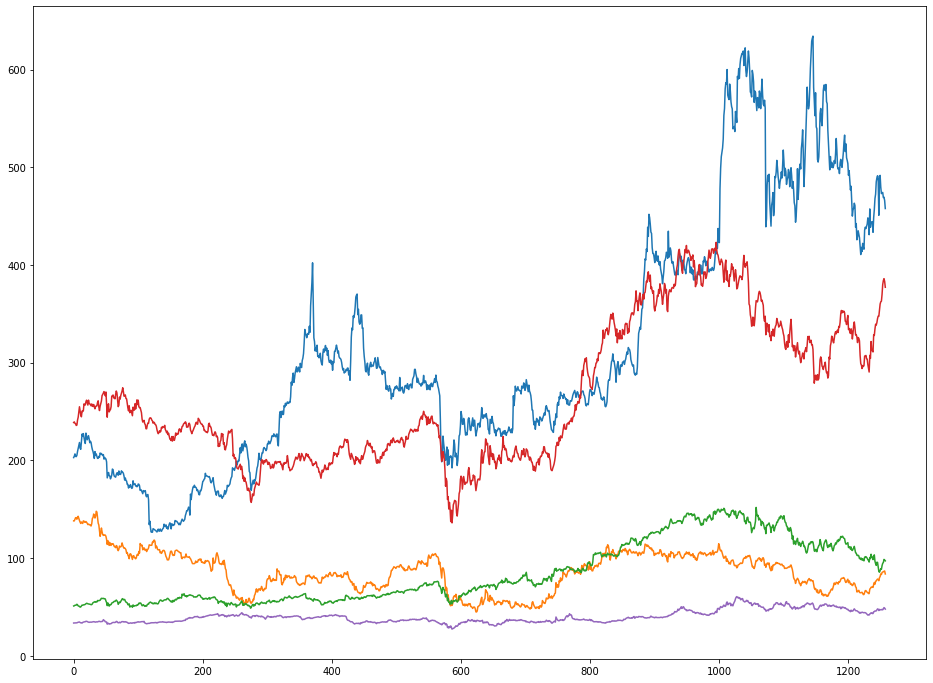

In [108]:
plt.figure(figsize=(16,12))
for i in range(5):
    plt.plot(values[:,i])

Repeat all steps from problem 1: the code can be recycled. Just be careful with the data size. After computing the returns, also plot the daily returns. How much can the value of the portfolio drop?

Try different target rates of return: set $\rho=10^{-4}, 2 \cdot 10^{-4}, 10 \cdot 10^{-4}, 20 \cdot 10^{-4}$. What are the differences between the returns on the training set and on the test set?

In [156]:
values.shape

(1258, 5)

In [157]:
#net
T = 1258
R = np.zeros((1257,5))
for t in range(T-1):
    for i in range(5):
        R[t,i] = (values[t+1, i]-values[t,i])/values[t,i]
R.shape


(1257, 5)

In [158]:
T = 628
R_train = R[0:T,:]
R_test = R[T:2*T,:]
R = R_train
R.shape

(628, 5)

In [159]:
n = 5
M = np.zeros(n)
for i in range(n):
    M[i] = np.mean(R[:T, i])
    
M


array([ 0.00057314, -0.00112517,  0.00068668, -0.00025081,  0.00020207])

In [160]:
#calculating A vector 
# code this up
def form_Amat(R,T,mu):
    n = R.shape[1]
    RtR = np.dot(R[:T, :].T, R[:T, :])
    ones = np.ones((1,n))
    ones_T = np.ones((n,1)) 
    mu_h = mu.reshape((n,1))
 
 
    A_top = np.concatenate((2*RtR,ones.T,mu_h), axis=1) 
 
    A_mid = np.concatenate((ones,np.zeros((1,2))), axis=1) 
 
    A_bot = np.concatenate((mu_h.T,np.zeros((1,2))), axis=1)
 
 
    A = np.concatenate((A_top,A_mid,A_bot), axis=0) 
 
    return A
A = form_Amat(R,T, M)
A

array([[ 7.92232294e-01,  1.64337295e-01,  1.59663906e-01,
         1.84312709e-01,  1.33692376e-01,  1.00000000e+00,
         5.73139366e-04],
       [ 1.64337295e-01,  1.13066377e+00,  2.95816778e-01,
         3.55400455e-01,  1.56980856e-01,  1.00000000e+00,
        -1.12516658e-03],
       [ 1.59663906e-01,  2.95816778e-01,  4.33814558e-01,
         2.67053847e-01,  1.43583737e-01,  1.00000000e+00,
         6.86677077e-04],
       [ 1.84312709e-01,  3.55400455e-01,  2.67053847e-01,
         4.91068517e-01,  1.50016101e-01,  1.00000000e+00,
        -2.50807618e-04],
       [ 1.33692376e-01,  1.56980856e-01,  1.43583737e-01,
         1.50016101e-01,  2.65581207e-01,  1.00000000e+00,
         2.02073300e-04],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.73139366e-04, -1.12516658e-03,  6.86677077e-04,
        -2.50807618e-04,  2.02073300e-04,  0.00000000e+00,
         0.0000000

In [162]:
def calculate_r_train(p):
    T = 628
    _2pTm = np.dot((2*p*T),M) #this is supposed to be b 
    b = np.append(_2pTm,[1,p])

    W_p0 = np.linalg.inv(A) @ b
    W_p0 = np.delete(W_p0, 5, axis=0)
    W_p0 = np.delete(W_p0, 5, axis=0)

    r_train = []
    r_train = R_train @ W_p0

    v = []
    v_i = 1
    for t in range(628):
        v_i *=  (1 + r_train[t])
        v.append(v_i)
    print('------------------------------------')
    print('For the value ro of:',p)
    print("The train set was finished with the value of", v_i)

    
calculate_r_train(10**-4)
calculate_r_train(2*10**-4)
calculate_r_train(10*10**-4)
calculate_r_train(20*10**-4)

------------------------------------
For the value ro of: 0.0001
The train set was finished with the value of 1.0068777792382806
------------------------------------
For the value ro of: 0.0002
The train set was finished with the value of 1.0736752656316402
------------------------------------
For the value ro of: 0.001
The train set was finished with the value of 1.722489591659456
------------------------------------
For the value ro of: 0.002
The train set was finished with the value of 2.8044029690287444


In [ ]:
# For some reason I couldn't access the values from the R_test
# You could see this fact in the above calculations from the first problem
# I don't know why this occures, but the R_test values are always zeroes
# Due to this fact I am not able to proceed with the r_test valuations
# Sorry ㅠㅠㅠㅠ